In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage  # Used skimage as noise functions
from IPython.display import clear_output


(256, 256)

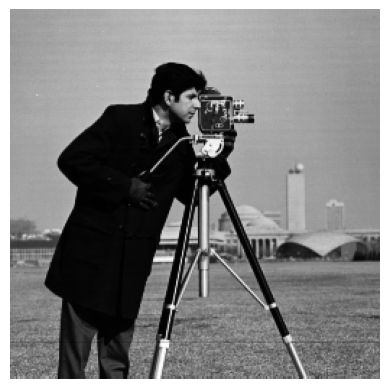

In [22]:
#Original image
img7 = cv2.imread('/content/cameraman.tif',cv2.IMREAD_GRAYSCALE)
plt.imshow(img7,cmap='gray')
plt.axis("off")

img7.shape

<ipython-input-24-7bc2cc326016>:11: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum2 = 20*np.log(np.abs(dft_shift2))


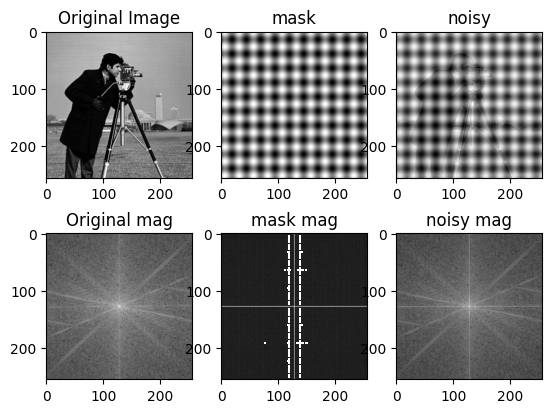

In [24]:
#org image
dft = np.fft.fft2(img7)
dft_shift = np.fft.fftshift(dft)
phase_spectrum = np.angle(dft_shift)
magnitude_spectrum = 20*np.log(np.abs(dft_shift))

#mask image
dft2 = np.fft.fft2(p)
dft_shift2 = np.fft.fftshift(dft2)
phase_spectrum2 = np.angle(dft_shift2)
magnitude_spectrum2 = 20*np.log(np.abs(dft_shift2))

#noisy image
dft3 = np.fft.fft2(imgn)
dft_shift3 = np.fft.fftshift(dft3)
phase_spectrum3 = np.angle(dft_shift3)
magnitude_spectrum3 = 20*np.log(np.abs(dft_shift3))

#plot
plt.subplot(2,3,1)
plt.imshow(img7, cmap='gray')
plt.title('Original Image')
plt.subplot(2,3,2)
plt.imshow(p, cmap='gray')
plt.title('mask')
plt.subplot(2,3,3)
plt.imshow(imgn, cmap='gray')
plt.title('noisy')
plt.subplot(2,3,4)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Original mag')
plt.subplot(2,3,5)
plt.imshow(magnitude_spectrum2, cmap='gray')
plt.title('mask mag')
plt.subplot(2,3,6)
plt.imshow(magnitude_spectrum3, cmap='gray')
plt.title('noisy mag')
plt.show()

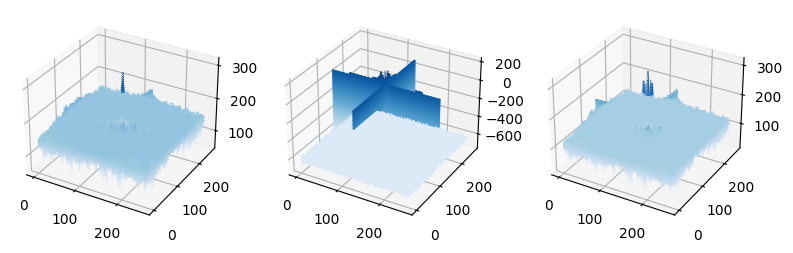

In [25]:
# ax = plt.axes(projection='3d')
t = np.arange(0,256,1)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

ax1.contour3D(t,t, magnitude_spectrum,50,cmap='Blues')
ax2.contour3D(t,t, magnitude_spectrum2,50,cmap='Blues')
ax3.contour3D(t,t, magnitude_spectrum3,50,cmap='Blues')

plt.show()

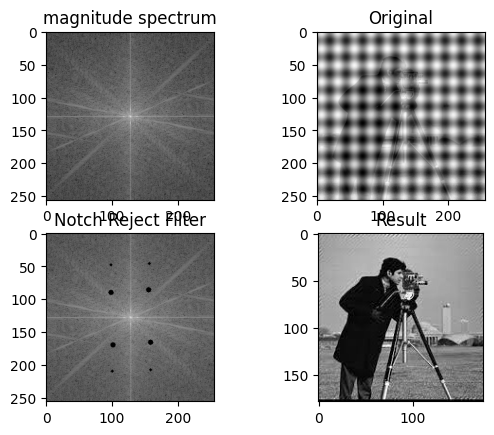

In [29]:
# Ideal notch filter

def Ideal_notch_reject_filter(shape: tuple[int, int], d0: int, u_k: int, v_k: int):
    (M, N) = shape

    H_0_u = np.repeat(np.arange(M), N).reshape((M, N))
    H_0_v = np.repeat(np.arange(N), M).reshape((N, M)).transpose()

    D_uv = np.sqrt((H_0_u - M / 2 + u_k) ** 2 + (H_0_v - N / 2 + v_k) ** 2)
    D_muv = np.sqrt((H_0_u - M / 2 - u_k) ** 2 + (H_0_v - N / 2 - v_k) ** 2)

    selector_1 = D_uv <= d0
    selector_2 = D_muv <= d0

    selector = np.logical_or(selector_1, selector_2)

    H = np.ones((M, N))
    H[selector] = 0

    return H
#-----------------------------------------------------

img = imgn


f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
phase_spectrumR = np.angle(fshift)
magnitude_spectrum = 20*np.log(np.abs(fshift))

img_shape = img.shape

H1 = Ideal_notch_reject_filter(img_shape, 4, 38, 30)
H2 = Ideal_notch_reject_filter(img_shape, 4, -42, 27)
H3 = Ideal_notch_reject_filter(img_shape, 2, 80, 30)
H4 = Ideal_notch_reject_filter(img_shape, 2, -82, 28)

NotchFilter = H1*H2*H3*H4
NotchRejectCenter = fshift * NotchFilter 
NotchReject = np.fft.ifftshift(NotchRejectCenter)
inverse_NotchReject = np.fft.ifft2(NotchReject)  # Compute the inverse DFT of the result


Result = np.abs(inverse_NotchReject)

plt.subplot(222)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(221)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('magnitude spectrum')

plt.subplot(223)
plt.imshow(magnitude_spectrum*NotchFilter, "gray") 
plt.title("Notch Reject Filter")

plt.subplot(224)
plt.imshow(imgx, "gray") 
plt.title("Result")


plt.show()
